# ASK

## Business task: 
To understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics.The answers to this questions would help us find recommendations on how to encourage casual riders to become members

# PREPARE

## Data source and information: 
1. This data publicly available on [this link](https://divvy-tripdata.s3.amazonaws.com/index.html).

2. This data is made available by Motivate International Inc. 

3. Although this is a public data but the  data-privacy issues prohibit us from using riders’ personally identifiable information. This means that we won’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes.This prevents us from knowing how often the same rider uses the biking service

4. Some Data to take note of are start station,end station, start and end ride times,member and casual rider,latitude and longitude

# PROCESS

  I decided to use python to process this data because i prefer its syntax to R.
  
  1. I merged the data 2020-2021.
  2. Drop duplicates

  3. Drop rows with inconsistent time where the start time was later than the end time

  4. Added columns for trip time in hours and minutes

  5. Added columns for Days of the week(DOW) ride started and ended

  6. Added columns for month(MON) ride started and ended
   
  7. Drop data lower than the lower limit and data higher than the upper limit






![Capstone report.png](<attachment:Capstone report.png>)
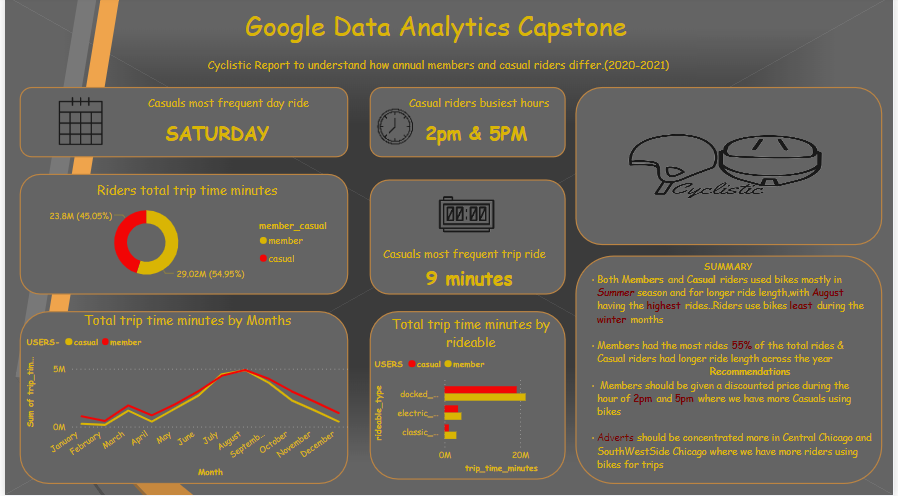

In [1]:
#import files using pandas and change date to datetime

import pandas as pd
import numpy as np


df1= pd.read_csv(r'C:\Users\user\Desktop\Google capstone\202004-divvy-tripdata.csv',sep =',', parse_dates=['started_at','ended_at'])
df2= pd.read_csv(r'C:\Users\user\Desktop\Google capstone\202005-divvy-tripdata.csv',sep =',', parse_dates=['started_at','ended_at'])
df3= pd.read_csv(r'C:\Users\user\Desktop\Google capstone\202006-divvy-tripdata.csv',sep =',', parse_dates=['started_at','ended_at'])
df4= pd.read_csv(r'C:\Users\user\Desktop\Google capstone\202007-divvy-tripdata.csv',sep =',',parse_dates=['started_at','ended_at'])
df5= pd.read_csv(r'C:\Users\user\Desktop\Google capstone\202008-divvy-tripdata.csv',sep =',', parse_dates=['started_at','ended_at'])
df6= pd.read_csv(r'C:\Users\user\Desktop\Google capstone\202009-divvy-tripdata.csv',sep =',',parse_dates=['started_at','ended_at'])


In [2]:
df7= pd.read_csv(r'C:\Users\user\Desktop\Google capstone\202010-divvy-tripdata.csv',sep =',',parse_dates=['started_at','ended_at'])
df8= pd.read_csv(r'C:\Users\user\Desktop\Google capstone\202011-divvy-tripdata.csv',sep =',',parse_dates=['started_at','ended_at'])
df9= pd.read_csv(r'C:\Users\user\Desktop\Google capstone\202012-divvy-tripdata.csv',sep =',',parse_dates=['started_at','ended_at'])
df10= pd.read_csv(r'C:\Users\user\Desktop\Google capstone\202101-divvy-tripdata.csv',sep =',',parse_dates=['started_at','ended_at'])
df11= pd.read_csv(r'C:\Users\user\Desktop\Google capstone\202102-divvy-tripdata.csv',sep =',',parse_dates=['started_at','ended_at'])
df12= pd.read_csv(r'C:\Users\user\Desktop\Google capstone\202103-divvy-tripdata.csv',sep =',',parse_dates=['started_at','ended_at'])


In [3]:
data_frames= [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]


In [4]:
# merge data using pandas concat
# drop duplicates
merged_data = pd.concat(data_frames, ignore_index=True).drop_duplicates(subset= ['ride_id'])

In [5]:
# drop row if the column "started_at" > "ended_at"
filt = merged_data['started_at'] > merged_data['ended_at']


merged_data.drop(merged_data.index[filt], inplace=True)

In [6]:
#create new column for trip time in hours
merged_data['TrpTIme_in_hrs'] = (merged_data['ended_at'] - merged_data['started_at'])

In [7]:
# create a column for triptime in minutes 
merged_data['trip_time_minutes']= (merged_data['TrpTIme_in_hrs'].dt.total_seconds())/60

In [8]:
# create columns for Days of the week when trip started and ended
merged_data['DOW(strt_trip)']= merged_data['started_at'].dt.day_name()
merged_data['DOW(End_trip)']= merged_data['ended_at'].dt.day_name()

In [9]:
# create a column for months trip started
merged_data['MON(strt_trip)']= merged_data['started_at'].dt.month_name()

In [10]:
new = merged_data['started_at']

In [11]:
#add a column(started_at) for 12hrs datetime
merged_data['timetrip_started(12hrs)'] = new.dt.strftime('%I:%M:%S %p')

In [12]:
new2 = merged_data['ended_at']

In [13]:
#add a column(ended_at) for 12hrs datetime
merged_data['timetrip_ended(12hrs)'] = new2.dt.strftime('%I:%M:%S %p')

In [14]:
merged_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,TrpTIme_in_hrs,trip_time_minutes,DOW(strt_trip),DOW(End_trip),MON(strt_trip),timetrip_started(12hrs),timetrip_ended(12hrs)
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,0 days 00:26:49,26.816667,Sunday,Sunday,April,05:45:14 PM,06:12:03 PM
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,0 days 00:08:09,8.150000,Friday,Friday,April,05:08:54 PM,05:17:03 PM
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,0 days 00:14:23,14.383333,Wednesday,Wednesday,April,05:54:13 PM,06:08:36 PM
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,0 days 00:12:12,12.200000,Tuesday,Tuesday,April,12:50:19 PM,01:02:31 PM
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,0 days 00:52:55,52.916667,Saturday,Saturday,April,10:22:59 AM,11:15:54 AM


In [15]:
# most frequent trip time in minutes
merged_data['trip_time_minutes'].mode()

0    9.0
dtype: float64

# What we can infer from the Data:

From the data,we discovered that most riders used bike service for short trips that
last around __9 mins usually on Saturdays__.

In [16]:
#most frequent day of the week for trip
merged_data['DOW(End_trip)'].mode()

0    Saturday
dtype: object

In [17]:
#drop trip time in minutes with "0.00" from minutes column
filt2= merged_data['trip_time_minutes'] == 0.00


merged_data.drop(merged_data.index[filt2],inplace=True)

In [18]:
#Descriptive stats on "trip_time_minutes" column
merged_data['trip_time_minutes'].describe().apply(lambda x: format(x,'f'))

count    3476396.000000
mean          27.973371
std          252.950356
min            0.016667
25%            7.983333
50%           14.583333
75%           26.716667
max        58720.033333
Name: trip_time_minutes, dtype: object

![](boxplot2.png)

This Boxplot helps identify outliers

In [19]:

# percentile,inter-quartile range,upper and lower limits for trip time in minutes

import pandas as pd
import numpy as np
Q75,Q25= np.percentile(merged_data['trip_time_minutes'], [75, 25])

IQR = Q75-Q25

IQR

lim = Q25 - 1.5 * IQR 
upper_lim = Q75 + 1.5 * IQR




In [20]:
lim

-20.11666666666666

In [21]:
upper_lim

54.81666666666666

In [22]:
IQR

18.73333333333333

In [23]:
#drop triptime in minute > upper limit
filt3= merged_data['trip_time_minutes'] > upper_lim

merged_data.drop(merged_data.index[filt3],inplace=True)

In [24]:
# descriptive stats for trip time in minutes
merged_data['trip_time_minutes'].describe().apply(lambda x: format(x,'f'))

count    3204162.000000
mean          16.481597
std           11.643544
min            0.016667
25%            7.516667
50%           13.316667
75%           23.000000
max           54.800000
Name: trip_time_minutes, dtype: object

In [25]:
# total trip time for each day of the week for bike users and sortvalues
ted= (merged_data.groupby(['member_casual','DOW(strt_trip)'])['trip_time_minutes']
                .sum().reset_index())

ted.sort_values(by='DOW(strt_trip)',ascending=False)

,member_casual,DOW(strt_trip),trip_time_minutes
6,casual,Wednesday,2.567666e+06
13,member,Wednesday,4.149325e+06
5,casual,Tuesday,2.364486e+06
12,member,Tuesday,3.850803e+06
4,casual,Thursday,2.685622e+06
11,member,Thursday,4.090149e+06
3,casual,Sunday,4.465440e+06
10,member,Sunday,4.090369e+06
2,casual,Saturday,5.770979e+06
9,member,Saturday,4.958118e+06


In [26]:
# average ride_length for users by day_of_week. 
users_avg_ridelength= (merged_data.groupby(['member_casual','DOW(strt_trip)'])['trip_time_minutes']
                             .mean().sort_values())

users_avg_ridelength


member_casual  DOW(strt_trip)
member         Tuesday           13.687947
               Wednesday         13.750004
               Monday            13.750860
               Thursday          13.763573
               Friday            14.043622
               Saturday          15.639271
               Sunday            15.734853
casual         Wednesday         18.868660
               Thursday          18.900318
               Tuesday           19.141140
               Friday            19.552272
               Monday            19.834055
               Saturday          21.350983
               Sunday            21.634885
Name: trip_time_minutes, dtype: float64

In [27]:
#group member and casual to find hours frequently traveled 

time = merged_data.groupby(['member_casual','DOW(strt_trip)'])





In [28]:
# most frequent hour of travel for casual
check= time['timetrip_started(12hrs)'].value_counts().loc['casual']



In [29]:
check.sort_values()

DOW(strt_trip)  timetrip_started(12hrs)
Wednesday       12:59:56 AM                 1
Tuesday         07:30:28 PM                 1
                07:30:26 AM                 1
                07:30:24 AM                 1
                07:30:23 AM                 1
                                           ..
Saturday        03:21:00 PM                70
                02:50:00 PM                70
                04:23:00 PM                72
                02:10:00 PM                72
                02:46:00 PM                73
Name: timetrip_started(12hrs), Length: 392215, dtype: int64

In [30]:
# most frequent hour of travel for member
check2= time['timetrip_started(12hrs)'].value_counts().loc['member']

In [31]:
check2.sort_values()

DOW(strt_trip)  timetrip_started(12hrs)
Wednesday       12:59:58 PM                 1
Monday          01:44:22 AM                 1
                01:44:12 PM                 1
                01:44:07 PM                 1
                01:43:59 PM                 1
                                           ..
Wednesday       06:14:00 PM                81
Thursday        05:29:00 PM                82
                05:09:00 PM                82
                06:13:00 PM                83
                06:05:00 PM                86
Name: timetrip_started(12hrs), Length: 448136, dtype: int64

In [32]:
#group data for casual according to day of the week,sum trip time in minutes then sortvalues
ted= (merged_data.groupby(['member_casual','DOW(strt_trip)'])['trip_time_minutes']
                    .sum().apply(lambda x: format(x,'f')).loc['casual'].reset_index())
                     

ted.sort_values(by='trip_time_minutes',ascending=False)

,DOW(strt_trip),trip_time_minutes
2,Saturday,5770978.650000
3,Sunday,4465440.216667
0,Friday,3446068.466667
4,Thursday,2685621.816667
6,Wednesday,2567666.066667
1,Monday,2487468.133333
5,Tuesday,2364485.866667


In [33]:

#group data for member according to day of the week,sum trip time in minutes then sortvalues
ted= merged_data.groupby(['member_casual','DOW(strt_trip)'])
ted['trip_time_minutes'].sum().sort_values().loc['member']



DOW(strt_trip)
Monday       3.635480e+06
Tuesday      3.850803e+06
Thursday     4.090149e+06
Sunday       4.090369e+06
Wednesday    4.149325e+06
Friday       4.247732e+06
Saturday     4.958118e+06
Name: trip_time_minutes, dtype: float64

In [34]:
# group data by month for member and sort values by triptime_minutes
ted= merged_data.groupby(['member_casual','MON(strt_trip)'])

reset_mem= ted['trip_time_minutes'].sum().loc['member'].reset_index()

reset_mem .sort_values(by='trip_time_minutes',ascending=False)





,MON(strt_trip),trip_time_minutes
1,August,4.895490e+06
5,July,4.397836e+06
11,September,4.146657e+06
6,June,3.072612e+06
10,October,3.044455e+06
9,November,2.135939e+06
8,May,1.934850e+06
7,March,1.834169e+06
2,December,1.182977e+06
0,April,9.825750e+05


In [35]:
# group data by month for casual and sort values by triptime_minutes
ted= merged_data.groupby(['member_casual','MON(strt_trip)'])

reset_cas= ted['trip_time_minutes'].sum().loc['casual'].reset_index()
reset_cas.sort_values(by='trip_time_minutes',ascending=False)


,MON(strt_trip),trip_time_minutes
1,August,4.879176e+06
5,July,4.534043e+06
11,September,3.803216e+06
6,June,2.691267e+06
10,October,2.268559e+06
8,May,1.558491e+06
7,March,1.383875e+06
9,November,1.379718e+06
2,December,4.407419e+05
0,April,4.376246e+05


In [59]:
#compare trip time minutes for member_casual in all the month
ted= merged_data.groupby(['member_casual','MON(strt_trip)'])

reset= ted['trip_time_minutes'].sum().reset_index()

# sort according to month
reset.sort_values(by='MON(strt_trip)',ascending=False)

,member_casual,MON(strt_trip),trip_time_minutes
23,member,September,4.146657e+06
11,casual,September,3.803216e+06
10,casual,October,2.268559e+06
22,member,October,3.044455e+06
21,member,November,2.135939e+06
9,casual,November,1.379718e+06
8,casual,May,1.558491e+06
20,member,May,1.934850e+06
7,casual,March,1.383875e+06
19,member,March,1.834169e+06


In [60]:
reset.to_csv('result.csv',index=False)

In [37]:
# start station with the highest frequency
merged_data['start_station_name'].mode()

0    Clark St & Elm St
dtype: object

In [38]:
#group data to find triptime for "Clark St & Elm St"
bike= merged_data.groupby(['start_station_name','member_casual'])

bike['trip_time_minutes'].sum().apply(lambda x: format(x,'f')).loc['Clark St & Elm St']



member_casual
casual    185609.350000
member    260993.783333
Name: trip_time_minutes, dtype: object

In [39]:
#group data and sort by trip time in minutes
bike2= merged_data.groupby(['rideable_type','member_casual'])

bike_grouping= bike2['trip_time_minutes'].sum().apply(lambda x: format(x,'f')).reset_index()




In [40]:
bike_grouping

,rideable_type,member_casual,trip_time_minutes
0,classic_bike,casual,1131698.550000
1,classic_bike,member,3115774.750000
2,docked_bike,casual,19081133.166667
3,docked_bike,member,21456121.233333
4,electric_bike,casual,3574897.500000
5,electric_bike,member,4450080.350000


In [41]:
#group bike use by users according to day of the week
bike_Dow_group= merged_data.groupby(['member_casual','DOW(strt_trip)'])

In [42]:
bike_Dow_group['rideable_type'].value_counts()

member_casual  DOW(strt_trip)  rideable_type
casual         Friday          docked_bike      134553
                               electric_bike     34758
                               classic_bike       6938
               Monday          docked_bike       92112
                               electric_bike     25463
                               classic_bike       7839
               Saturday        docked_bike      209790
                               electric_bike     44504
                               classic_bike      15997
               Sunday          docked_bike      160669
                               electric_bike     33798
                               classic_bike      11933
               Thursday        docked_bike      106287
                               electric_bike     30097
                               classic_bike       5710
               Tuesday         docked_bike       90083
                               electric_bike     25920
                    

In [43]:
#group data by month,days of the week and riders to get day in month with most rides
group_month_day = merged_data.groupby(['member_casual','MON(strt_trip)'])

In [44]:
view = group_month_day['DOW(strt_trip)'].value_counts().loc['casual']

In [45]:
view.head(50)

MON(strt_trip)  DOW(strt_trip)
April           Sunday             5027
                Saturday           3185
                Tuesday            2952
                Monday             2274
                Friday             2160
                Thursday           2116
                Wednesday          1552
August          Saturday          58473
                Sunday            45711
                Friday            32760
                Thursday          26051
                Wednesday         24848
                Monday            24450
                Tuesday           23610
December        Sunday             4595
                Thursday           4399
                Wednesday          4304
                Saturday           4173
                Tuesday            3782
                Monday             3325
                Friday             3225
February        Saturday           2972
                Friday             1362
                Sunday             1223
         

In [46]:
#group bike users by users, month and bike types to find bike type used most in different season

month_bike_type = merged_data.groupby(['member_casual','MON(strt_trip)'])


In [47]:
month_bike_type['rideable_type'].value_counts().loc['casual']

MON(strt_trip)  rideable_type
April           docked_bike       19266
August          docked_bike      211276
                electric_bike     24627
December        electric_bike     13266
                classic_bike      10407
                docked_bike        4130
February        classic_bike       4990
                electric_bike      3021
                docked_bike         990
January         classic_bike       7731
                electric_bike      7569
                docked_bike        1739
July            docked_bike      205418
                electric_bike       746
June            docked_bike      121499
March           classic_bike      39783
                electric_bike     21037
                docked_bike       11544
May             docked_bike       67648
November        electric_bike     39057
                docked_bike       38466
October         docked_bike       68303
                electric_bike     60917
September       docked_bike      143271
          

In [48]:
month_bike_type['rideable_type'].value_counts().loc['member']

MON(strt_trip)  rideable_type
April           docked_bike       60171
August          docked_bike      289570
                electric_bike     36707
December        classic_bike      58979
                electric_bike     33715
                docked_bike        7765
February        classic_bike      28811
                electric_bike      9948
January         classic_bike      53065
                electric_bike     24984
                docked_bike           1
July            docked_bike      275761
                electric_bike      1065
June            docked_bike      183122
March           classic_bike     106065
                electric_bike     36874
May             docked_bike      110966
November        docked_bike      104025
                electric_bike     65322
October         docked_bike      153809
                electric_bike     86149
September       docked_bike      228925
                electric_bike     68305
Name: rideable_type, dtype: int64

# DATA VISUALIZATION

In [1]:

import pandas as pd     #(version 1.0.0)
import plotly           #(version 4.5.4) #pip install plotly==4.5.4
import plotly.express as px
import plotly.io as pio

df= pd.read_csv(r'C:\Users\user\Desktop\git_learn\result.csv')




barchart = px.bar(
    data_frame=df,
    y="MON(strt_trip)",
    x="trip_time_minutes",
    color="member_casual",               # differentiate color of marks
    opacity=1.0,                  # set opacity of markers (from 0 to 1)
    orientation="h",              # 'v','h': orientation of the marks
    barmode='relative',

    color_discrete_map={"member": "gray" ,"casual":"red"},
    text='trip_time_minutes',

    labels={"trip_time_minutes":"Montly Trip time in minutes",
    "member_casual":"Members&Casuals"},           # map the labels of the figure
    title="Montly Trip time in minutes", # figure title
    width=1400,                   # figure width in pixels
    height=1100,                   # figure height in pixels
    template='plotly_dark',) 

barchart.update_traces(texttemplate='%{text:.2s}', textposition='inside',
                      width=[.3,.3,.3])

pio.show(barchart)

![](hor_bar.png)

Horizontal BarChart shows trip time in minutes by riders for each month.

In [63]:
import pandas as pd     #(version 1.0.0)
import plotly           #(version 4.5.4) #pip install plotly==4.5.4
import plotly.express as px
import plotly.io as pio

df= pd.read_csv(r'C:\Users\user\Desktop\python\bike_grouping.csv')

print(df)

barchart = px.bar(
    data_frame=df,
    x="trip_time_minutes",
    y="rideable_type",
    color="member_casual",              
    opacity=0.9,                 
    orientation="h",              
    barmode='relative',          

    color_discrete_map={"member": "gray" ,"casual":"red"},

    text='trip_time_minutes',

    labels={"trip_time_minutes":"Trip time in minutes",
    "member_casual":"Members&Casuals"},           
    title='Trip time for cycling in Chicago', 
    width=1000,                   
    height=500,                 
    template='plotly_dark',)

pio.show(barchart)
                    

   rideable_type member_casual  trip_time_minutes
0   classic_bike        casual       1.131699e+06
1   classic_bike        member       3.115775e+06
2  electric_bike        casual       3.574898e+06
3  electric_bike        member       4.450080e+06
4    docked_bike        casual       1.909264e+07
5    docked_bike        member       2.145833e+07


![](bicycle_group.png)

Horizontal BarChart shows trip time in minutes by riders for each bikes.

In [ ]:
#![](line_graph.png)

![](casual_map.png)

The scatter plot map colored in fire show area in chicago where casual riders begin trip with
Central chicago and SouthWestSide Chicago having a larger amount of riders.  



I used __plotly__ and __data_shader__ in python for data visualisation.

From the data given,the major difference in bike usage between casual riders
and member is that casual riders use bikes more on weekends and least at the beginning of the week.
while members use bikes evenly across the week.

Both casual riders and members use the docked bikes most for trips and the classic bikes least for 
trips

Casual riders use bikes more between the hour of __2pm/4pm__ on saturdays whereas members use the bikes 
more between the hour of __5pm/6pm__

Both members and casual riders use bikes most and for longer periods from July to September,with 
August having the highest rides.Riders use bikes least during the winter months

Casual riders use bikes fairly between march and june with a slight reduction in bike use in May.
Casual riders fairly make use of Electric bike during autumn and classic bikes are majorly used in 
March and February.

For trip duration, casual riders have longer rides across the whole year

Most riders picked up their bike majorly from the Central Chicago Station and then the SouthWestSide Chicago
station


# IN ORDER TO CONVERT CASUAL RIDERS TO MEMBERS THESE ACTIONS SHOULD BE TAKEN:

- Increase the price for single ride and full day passes

- More preference should be given members in peak season

- Increase sensitization and promotional activities that encourages casual riders 
to become members during the weekends(their peak period of bike use)

- Since both members and casual make use of docked bikes in peak periods,more docked bikes should be allocated to members at a discounted price

- Adverts should be concentrated more in __Central Chicago and SouthWestSide Chicago__ where we have more riders 
using bikes for trips

- Members should be given a discounted price during the hour of __2pm to 5pm__ where we have more casuals using 
bikes

- A detailed promotional material should be given to casuals showimg how cost effective registering as member
would be

# CONCLUSION

A more detailed info about the riders IDs would help us determine how often they used the services. This would help us get a consistent detail about each riders preference.








